In [2]:
!pip import seaborn

ERROR: unknown command "import"


In [11]:
import pandas as pd
import numpy as np
from  matplotlib import pyplot as plt
import networkx as nx
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [2]:
dfz = pd.read_parquet('dfz_2020.parquet')
dfz_c= pd.read_parquet('dfz_2020_c.parquet')
# Create the directed, weighted graph for base scenario from DataFrame
G = nx.from_pandas_adjacency(dfz, create_using=nx.DiGraph)
G_c = nx.from_pandas_adjacency(dfz_c, create_using=nx.DiGraph)

dfz_b = pd.read_parquet('dfz_bc.parquet')
dfz_b_c= pd.read_parquet('dfz_bc_c.parquet')
# Create the directed, weighted graph for bca scenario from DataFrame
G_b = nx.from_pandas_adjacency(dfz_b, create_using=nx.DiGraph)
G_b_c = nx.from_pandas_adjacency(dfz_b_c, create_using=nx.DiGraph)

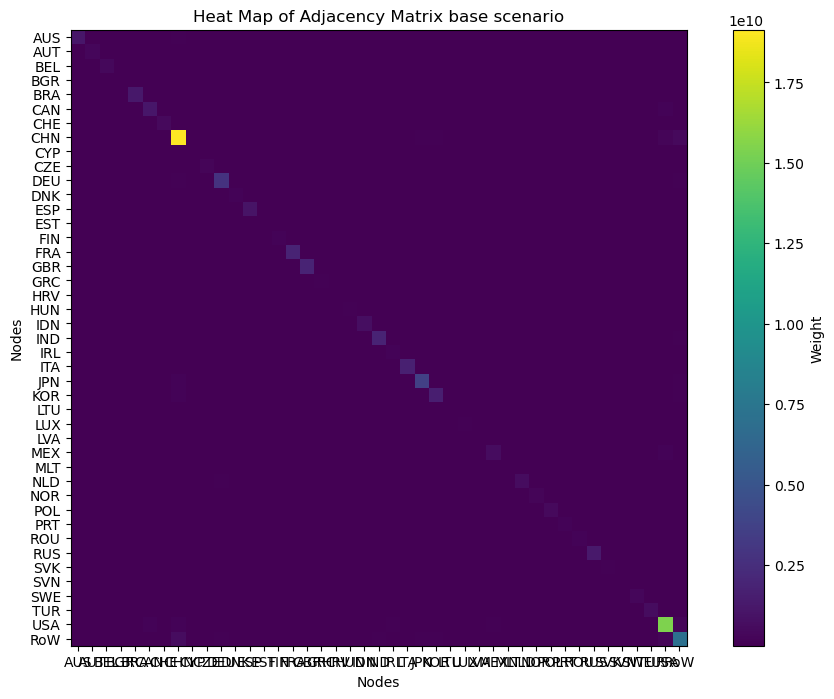

In [5]:
# Create a heat map of G_c
plt.figure(figsize=(12, 8))
plt.imshow(dfz_c, cmap='viridis', interpolation='none')
plt.colorbar(label='Weight')
plt.title('Heat Map of Adjacency Matrix base scenario')
plt.xlabel('Nodes')
plt.ylabel('Nodes')

# Add gridlines and node labels
plt.xticks(ticks=range(len(G_c.nodes)), labels=list(G_c.nodes))
plt.yticks(ticks=range(len(G_c.nodes)), labels=list(G_c.nodes))
#plt.grid(False)

plt.show()

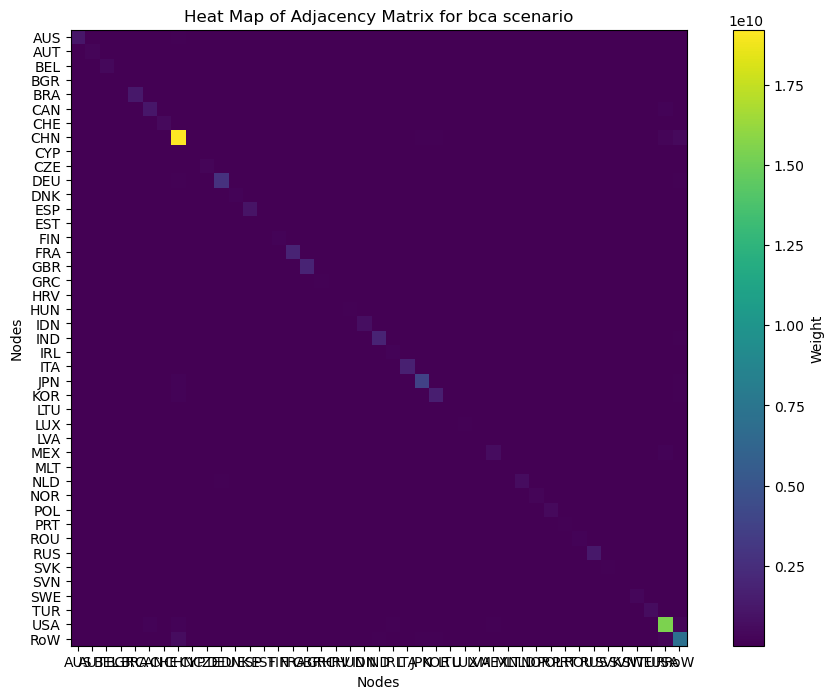

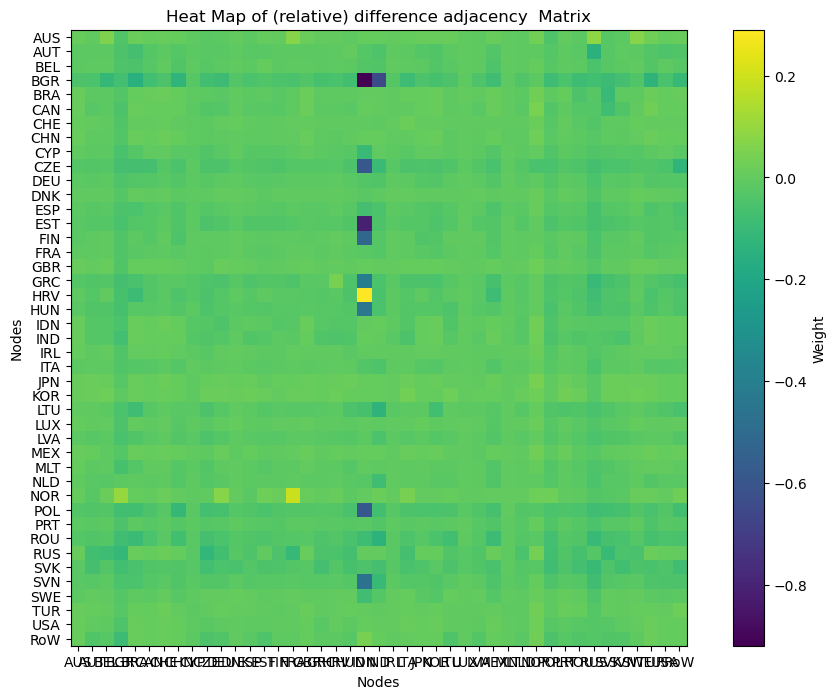

In [6]:
# Create a heat map of G_b_c
plt.figure(figsize=(12, 8))
plt.imshow(dfz_b_c, cmap='viridis', interpolation='none')
plt.colorbar(label='Weight')
plt.title('Heat Map of Adjacency Matrix for bca scenario')
plt.xlabel('Nodes')
plt.ylabel('Nodes')

# Add gridlines and node labels
plt.xticks(ticks=range(len(G_c.nodes)), labels=list(G_c.nodes))
plt.yticks(ticks=range(len(G_c.nodes)), labels=list(G_c.nodes))
#plt.grid(False)

plt.show()

#create an adjacency matrix equal to the relative difference of A_bca and A
df_dif_b = (dfz_b_c - dfz_c) / dfz_c
df_dif_b.head()

# Create a heat map
plt.figure(figsize=(12, 8))
plt.imshow(df_dif_b, cmap='viridis', interpolation='none')
plt.colorbar(label='Weight')
plt.title('Heat Map of (relative) difference adjacency  Matrix')
plt.xlabel('Nodes')
plt.ylabel('Nodes')

# Add gridlines and node labels
plt.xticks(ticks=range(len(G_c.nodes)), labels=list(G_c.nodes))
plt.yticks(ticks=range(len(G_c.nodes)), labels=list(G_c.nodes))
#plt.grid(False)

plt.show()

In [7]:
# Get in-degrees and out-degrees for each node
in_degrees = dict(G_b.in_degree())  # In-degree for each node
out_degrees = dict(G_b.out_degree())  # Out-degree for each node
# Convert the in-degrees and out-degrees to lists for easier computation
in_degree_values = list(in_degrees.values())
out_degree_values = list(out_degrees.values())

# Calculate mean and standard deviation for in-degree and out-degree
mean_in_degree = np.mean(in_degree_values)
std_in_degree = np.std(in_degree_values)

mean_out_degree = np.mean(out_degree_values)
std_out_degree = np.std(out_degree_values)

# Print the mean and standard deviation
print(f"In-Degree - Mean: {mean_in_degree}, Standard Deviation: {std_in_degree}")
print(f"Out-Degree - Mean: {mean_out_degree}, Standard Deviation: {std_out_degree}")

In-Degree - Mean: 2063.0, Standard Deviation: 0.0
Out-Degree - Mean: 2063.0, Standard Deviation: 0.0


In [8]:
#def a function to create cumulative dict for countries
def cum_count(D):
    cum_count_D = {}
    # Loop over each key in the original dictionary
    for key, value in D.items():
        # Extract the prefix (the part before the underscore)
        prefix = key.split('_')[0]
    
        # Sum the values for each prefix
        if prefix in cum_count_D:
            cum_count_D[prefix] += value
        else:
            cum_count_D[prefix] = value
    return cum_count_D

Weight - Mean: 19327.383724511426, Standard Deviation: 1236172.9579948445


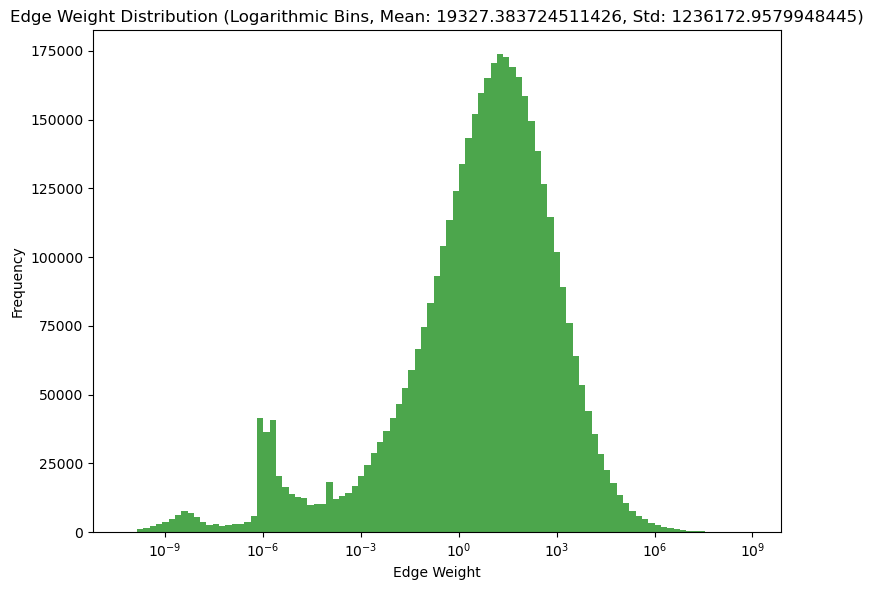

in_strength - Mean: 39872392.62366707, Standard Deviation: 134550988.60968366


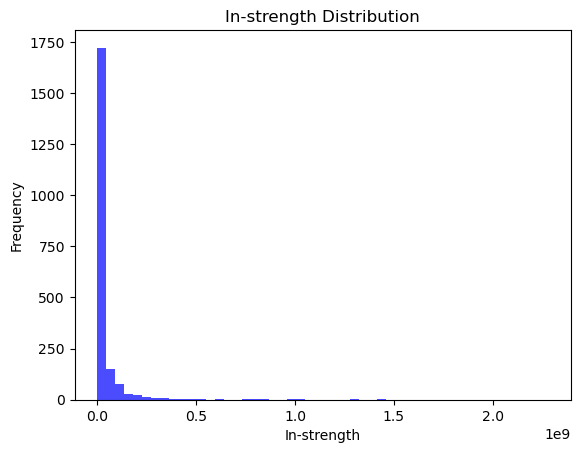

out_strength - Mean: 39872392.623667076, Standard Deviation: 140462305.9317053


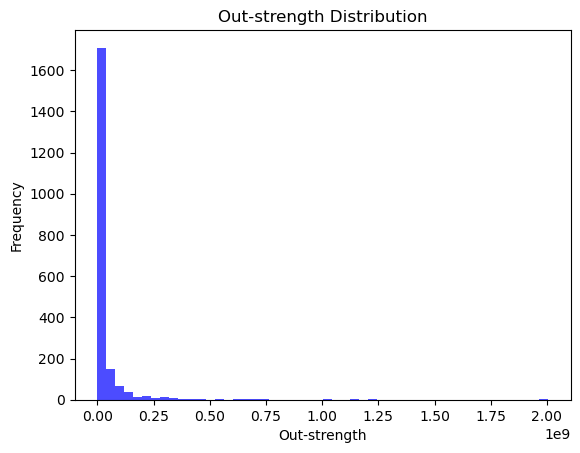

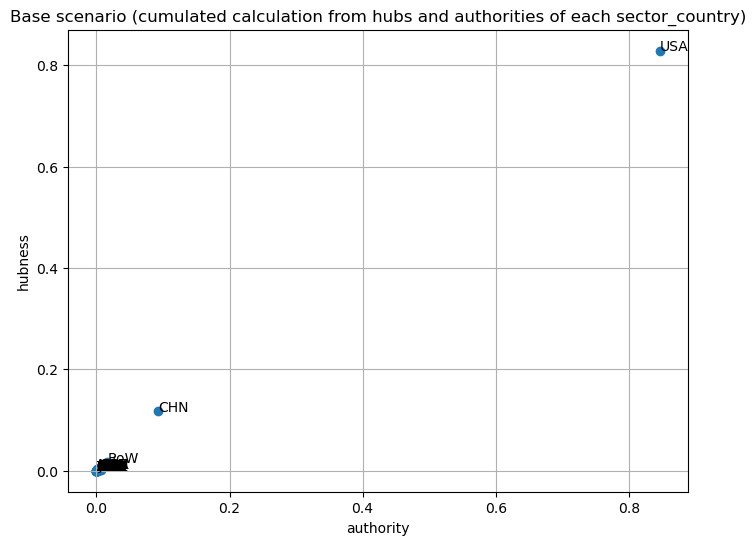

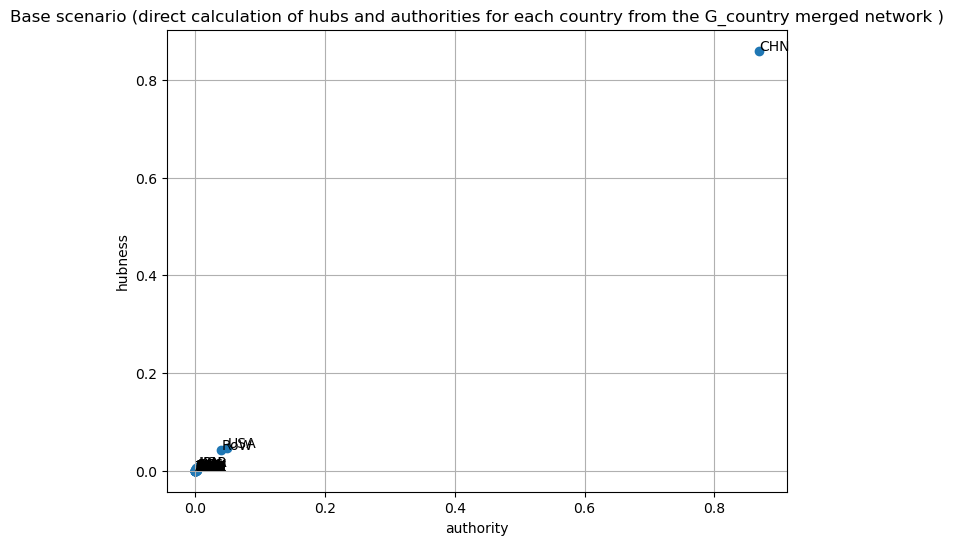

In [9]:
#centrality measures for Base

######## Weight ########
weights = dfz.values.flatten() # Flatten the matrix to extract the weights
mean_weight = np.mean(weights)
std_weight = np.std(weights)
print(f"Weight - Mean: {mean_weight}, Standard Deviation: {std_weight}")
# Plot with logarithmic bins
plt.figure(figsize=(8, 6))
plt.hist(weights, bins=np.logspace(np.log10(min(weights)), np.log10(max(weights)), 100), color='g', alpha=0.7)
plt.xscale('log')
plt.title(f'Edge Weight Distribution (Logarithmic Bins, Mean: {mean_weight}, Std: {std_weight})')
plt.xlabel('Edge Weight')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show() 

######## In and Out strenght ########
in_str = {node: sum(data['weight'] for _, _, data in G.in_edges(node, data=True)) for node in G.nodes}
plt.hist(in_str.values(), bins = 50, color='b', alpha=0.7)
plt.title('In-strength Distribution')
plt.xlabel('In-strength') 
plt.ylabel('Frequency') 
in_str_val = list(in_str.values())
mean_in_str = np.mean(in_str_val)
std_in_str = np.std(in_str_val)
print(f"in_strength - Mean: {mean_in_str}, Standard Deviation: {std_in_str}")
plt.show()

out_str = {node: sum(data['weight'] for _, _, data in G.out_edges(node, data=True)) for node in G.nodes}
plt.hist(out_str.values(), bins = 50, color='b', alpha=0.7)
plt.title('Out-strength Distribution')
plt.xlabel('Out-strength') 
plt.ylabel('Frequency') 
out_str_val = list(out_str.values())
mean_out_str = np.mean(out_str_val)
std_out_str = np.std(out_str_val)
print(f"out_strength - Mean: {mean_out_str}, Standard Deviation: {std_out_str}")

######## Hubs and authorities ########
### from G ###
hub_aut = nx.hits(G)
hub_c= cum_count(hub_aut[0])
aut_c= cum_count(hub_aut[1])
keys = list(hub_c.keys()) 
aut_val = [aut_c[key] for key in keys] #x-axis
hub_val = [hub_c[key] for key in keys] #y-axis

plt.figure(figsize=(8, 6))
plt.scatter(aut_val, hub_val)

for i, key in enumerate(keys): # Annotate points with their labels
    plt.annotate(key, (aut_val[i], hub_val[i]))
# Set the range for x and y axes
#plt.xlim(0.0, 0.075) 
#plt.ylim(0.0, 0.08) 

plt.xlabel('authority')
plt.ylabel('hubness')
plt.title('Base scenario (cumulated calculation from hubs and authorities of each sector_country)')

# Display the plot
plt.grid(True)
plt.show()

### from G_c ###
hub_aut_c = nx.hits(G_c)
keys = list(hub_aut_c[1].keys()) 
val_aut = [hub_aut_c[1][key] for key in keys] #x-axis
val_hub = [hub_aut_c[0][key] for key in keys] #y-axis


# Plot
plt.figure(figsize=(8, 6))
plt.scatter(val_aut, val_hub)

# Annotate points with their labels
for i, key in enumerate(keys):
    plt.annotate(key, (val_aut[i], val_hub[i]))
# Set the range for x and y axes
#plt.xlim(0.0, 0.075) 
#plt.ylim(0.0, 0.08) 

# Label axes
plt.xlabel('authority')
plt.ylabel('hubness')
plt.title('Base scenario (direct calculation of hubs and authorities for each country from the G_country merged network )')

# Display the plot
plt.grid(True)
plt.show()

Weight - Mean: 19315.94847436987, Standard Deviation: 1240432.7242848594


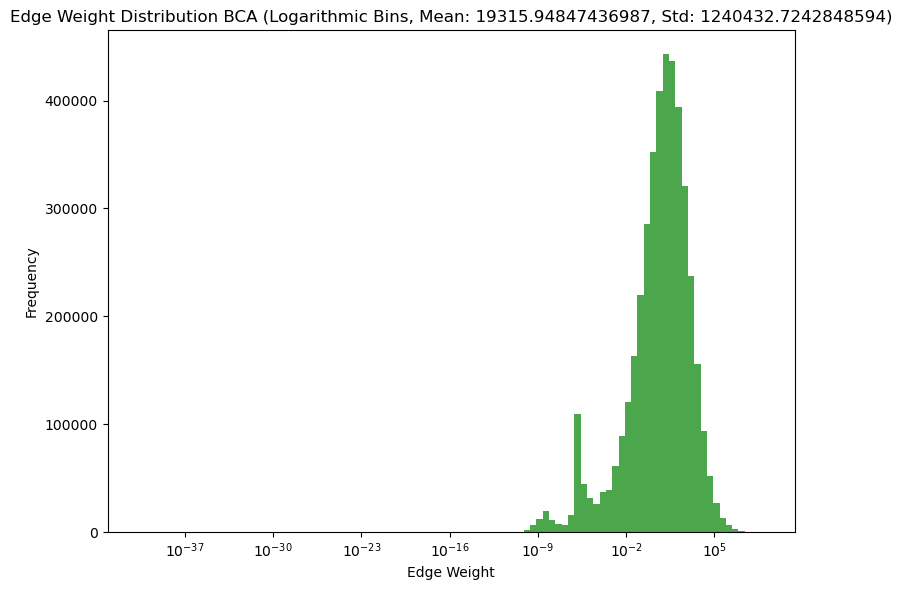

in_strength - Mean: 39848801.70262503, Standard Deviation: 134984817.2275121


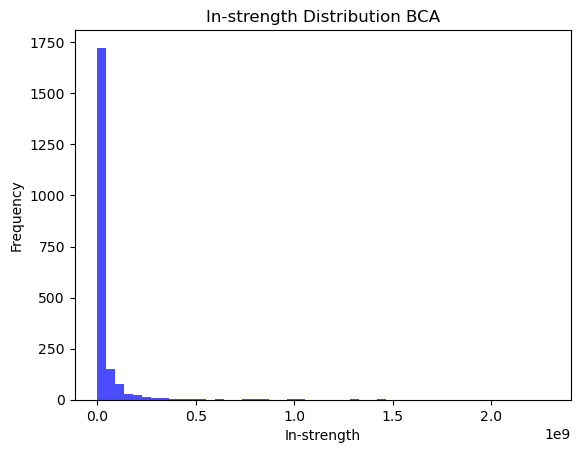

out_strength - Mean: 39848801.70262503, Standard Deviation: 140920163.90629598


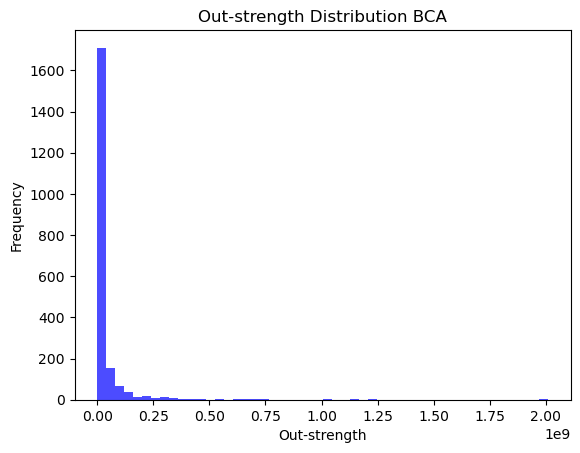

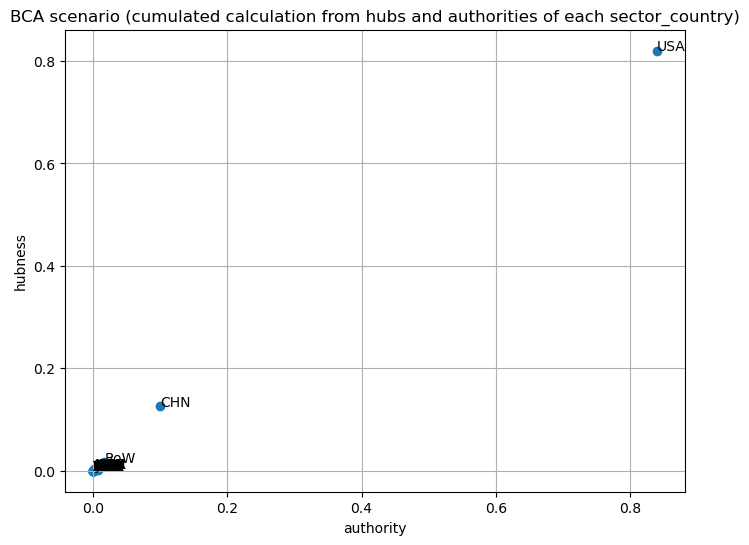

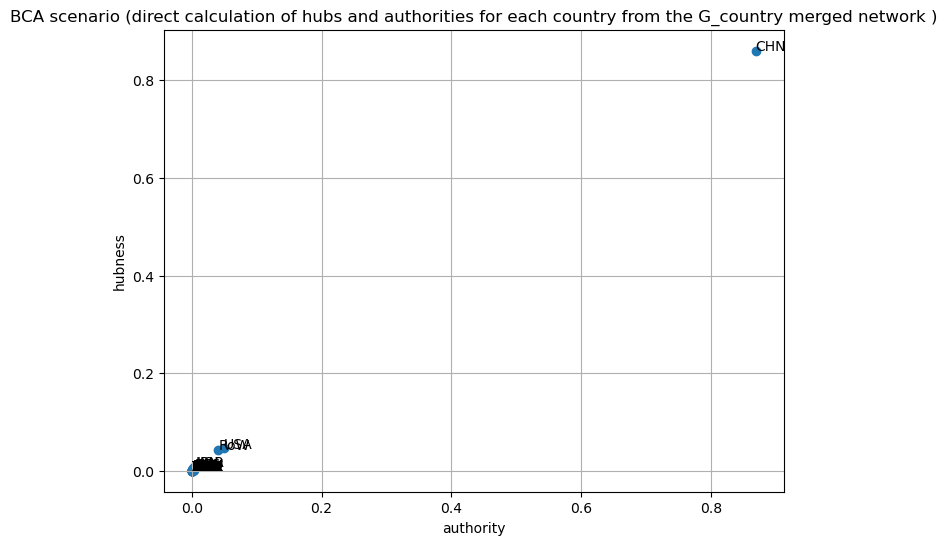

In [10]:
#centrality measures for BCA

######## Weight ########
weights = dfz_b.values.flatten() # Flatten the matrix to extract the weights
mean_weight = np.mean(weights)
std_weight = np.std(weights)
print(f"Weight - Mean: {mean_weight}, Standard Deviation: {std_weight}")
# Plot with logarithmic bins
plt.figure(figsize=(8, 6))
plt.hist(weights, bins=np.logspace(np.log10(min(weights)), np.log10(max(weights)), 100), color='g', alpha=0.7)
plt.xscale('log')
plt.title(f'Edge Weight Distribution BCA (Logarithmic Bins, Mean: {mean_weight}, Std: {std_weight})')
plt.xlabel('Edge Weight')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show() 

######## In and Out strenght ########
in_str = {node: sum(data['weight'] for _, _, data in G_b.in_edges(node, data=True)) for node in G_b.nodes}
plt.hist(in_str.values(), bins = 50, color='b', alpha=0.7)
plt.title('In-strength Distribution BCA')
plt.xlabel('In-strength') 
plt.ylabel('Frequency') 
in_str_val = list(in_str.values())
mean_in_str = np.mean(in_str_val)
std_in_str = np.std(in_str_val)
print(f"in_strength - Mean: {mean_in_str}, Standard Deviation: {std_in_str}")
plt.show()

out_str = {node: sum(data['weight'] for _, _, data in G_b.out_edges(node, data=True)) for node in G_b.nodes}
plt.hist(out_str.values(), bins = 50, color='b', alpha=0.7)
plt.title('Out-strength Distribution BCA')
plt.xlabel('Out-strength') 
plt.ylabel('Frequency') 
out_str_val = list(out_str.values())
mean_out_str = np.mean(out_str_val)
std_out_str = np.std(out_str_val)
print(f"out_strength - Mean: {mean_out_str}, Standard Deviation: {std_out_str}")

######## Hubs and authorities ########
### from G_b ###
hub_aut_b = nx.hits(G_b)
hub_b_c= cum_count(hub_aut_b[0])
aut_b_c= cum_count(hub_aut_b[1])
keys = list(hub_c.keys()) 
aut_val = [aut_b_c[key] for key in keys] #x-axis
hub_val = [hub_b_c[key] for key in keys] #y-axis

plt.figure(figsize=(8, 6))
plt.scatter(aut_val, hub_val)

for i, key in enumerate(keys): # Annotate points with their labels
    plt.annotate(key, (aut_val[i], hub_val[i]))
# Set the range for x and y axes
#plt.xlim(0.0, 0.075) 
#plt.ylim(0.0, 0.08) 

plt.xlabel('authority')
plt.ylabel('hubness')
plt.title('BCA scenario (cumulated calculation from hubs and authorities of each sector_country)')

# Display the plot
plt.grid(True)
plt.show()

### from G_c_b ###
hub_aut_b_c = nx.hits(G_b_c)
keys = list(hub_aut_c[1].keys()) 
val_aut = [hub_aut_b_c[1][key] for key in keys] #x-axis
val_hub = [hub_aut_b_c[0][key] for key in keys] #y-axis


# Plot
plt.figure(figsize=(8, 6))
plt.scatter(val_aut, val_hub)

# Annotate points with their labels
for i, key in enumerate(keys):
    plt.annotate(key, (val_aut[i], val_hub[i]))
# Set the range for x and y axes
#plt.xlim(0.0, 0.075) 
#plt.ylim(0.0, 0.08) 

# Label axes
plt.xlabel('authority')
plt.ylabel('hubness')
plt.title('BCA scenario (direct calculation of hubs and authorities for each country from the G_country merged network )')

# Display the plot
plt.grid(True)
plt.show()

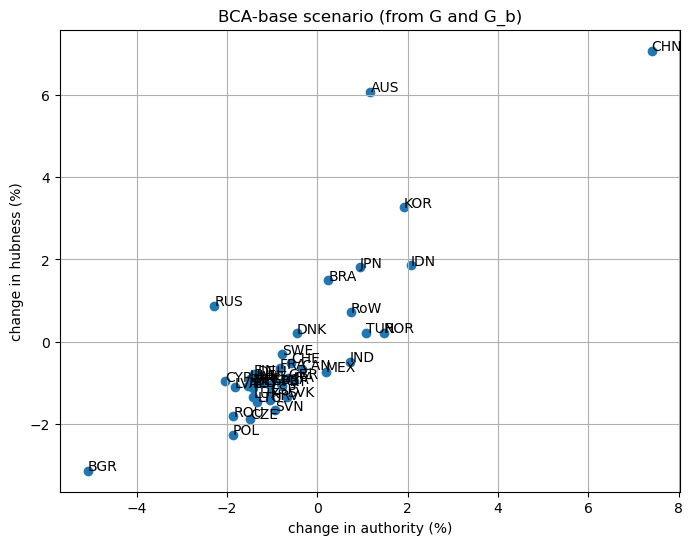

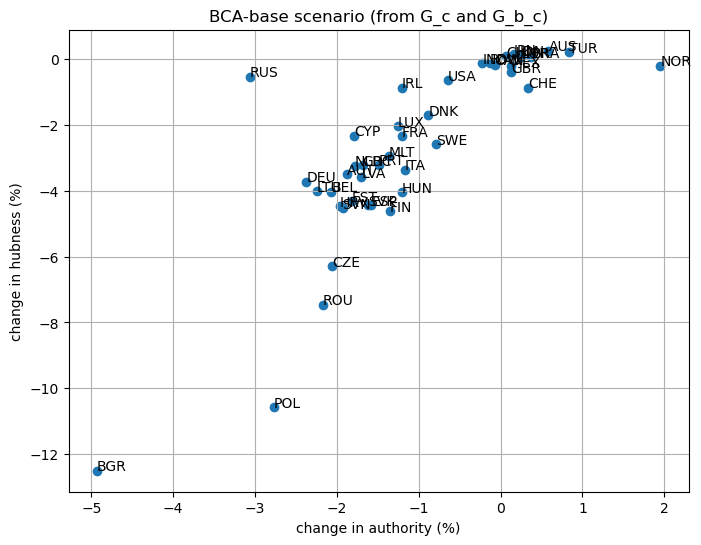

In [11]:
#compute the relative difference between hubs and authorities from G and G_b
diff_hub = {label: ((hub_b_c[label] - hub_c[label]) / hub_c[label])*100  for label in hub_c}
diff_aut = {label: ((aut_b_c[label] - aut_c[label]) / aut_c[label])*100  for label in aut_c}

# Plot
keys = list(diff_hub.keys()) 
values_author = [diff_aut[key] for key in keys] #x-axis
values_hubs = [diff_hub[key] for key in keys] #y-axis
plt.figure(figsize=(8, 6))
plt.scatter(values_author, values_hubs)

for i, key in enumerate(keys): # Annotate points with their labels
    plt.annotate(key, (values_author[i], values_hubs[i]))
    
plt.xlabel('change in authority (%)')
plt.ylabel('change in hubness (%)')
plt.title('BCA-base scenario (from G and G_b)')

plt.grid(True)
plt.show()

###############################################################################
#compute the relative difference between hubs and authorities from G_c and G_b_c
diff_hub_c = {label: ((hub_aut_b_c[0][label] - hub_aut_c[0][label]) / hub_aut_c[0][label])*100  for label in hub_aut_c[0]}
diff_aut_c = {label: ((hub_aut_b_c[1][label] - hub_aut_c[1][label]) / hub_aut_c[1][label])*100  for label in hub_aut_c[1]}

# Plot
keys = list(diff_hub_c.keys()) 
values_author = [diff_aut_c[key] for key in keys] #x-axis
values_hubs = [diff_hub_c[key] for key in keys] #y-axis
plt.figure(figsize=(8, 6))
plt.scatter(values_author, values_hubs)

for i, key in enumerate(keys): # Annotate points with their labels
    plt.annotate(key, (values_author[i], values_hubs[i]))
    
plt.xlabel('change in authority (%)')
plt.ylabel('change in hubness (%)')
plt.title('BCA-base scenario (from G_c and G_b_c)')

plt.grid(True)
plt.show()

In [3]:
def normalize_edge_weights(G):
    G_copy = G.copy()
    # Extract all edge weights
    weights = [G[u][v]['weight'] for u, v in G.edges()]
    
    w_min, w_max = min(weights), max(weights)
    
    # Avoid division by zero if all weights are the same
    if w_max == w_min:
        return G_copy  # No need to normalize if all weights are identical
    
    # Normalize each edge weight in the copied graph
    for u, v in G_copy.edges():
        G_copy[u][v]['weight'] = (G_copy[u][v]['weight'] - w_min) / (w_max - w_min)
    
    return G_copy

In [2]:
def sparsify_3pct_by_sector_inflow(G, threshold, weight_key='weight'):
    """
    Create a new DiGraph H where, for each buyer node v,
    we group its in-edges by the supplier sector and keep
    only those edges >= threshold * (total inflow from that sector).

    Then, for each node, if the sum of its outgoing edges in H is
    less than 50% of the sum of its outgoing edges in G, we add
    the highest-weight outgoing edges from G until we reach >= 50%.

    Assumes each node name looks like 'COUNTRY_SECTOR',
    e.g. 'FRA_MANche' or 'CHN_MANche'.
    """
    H = nx.DiGraph()

    # --- 1) Keep edges >= threshold * sector inflow ---
    for v in G.nodes():
        # All in-edges to v
        in_edges_data = G.in_edges(v, data=True)

        # 1A) Sum flows by supplier sector
        sector_in_sum = {}
        for (u, _, data) in in_edges_data:
            w = data.get(weight_key, 0.0)
            try:
                # Split "FRA_MANche" into "FRA" and "MANche"
                supplier_country, supplier_sector = u.split('_', 1)
            except ValueError:
                # If node naming doesn't match, skip or handle differently
                continue
            sector_in_sum.setdefault(supplier_sector, 0.0)
            sector_in_sum[supplier_sector] += w

        # 1B) Keep only edges >= threshold * total_for_that_sector
        for (u, _, data) in in_edges_data:
            w = data.get(weight_key, 0.0)
            try:
                supplier_country, supplier_sector = u.split('_', 1)
            except ValueError:
                continue

            total_for_sector = sector_in_sum.get(supplier_sector, 0.0)
            if total_for_sector > 0 and w >= threshold * total_for_sector:
                # Add edge to H
                H.add_edge(u, v, **{weight_key: w})

    # --- 2) Ensure each node's outgoing edges in H reach >= 50% of G's total ---
    for node in H.nodes():
        # 2A) Sum of outgoing edges in H
        out_edges_H = H.out_edges(node, data=True)
        sum_H = sum(data.get(weight_key, 0.0) for _, _, data in out_edges_H)

        # 2B) Sum of outgoing edges in G
        out_edges_G = G.out_edges(node, data=True)
        sum_G = sum(data.get(weight_key, 0.0) for _, _, data in out_edges_G)

        # 2C) If < 50%, add highest-weight edges from G until we reach >= 50%
        if sum_G > 0:
            ratio = sum_H / sum_G
            if ratio < 0.5:
                # Sort G's outgoing edges (descending by weight)
                sorted_out_edges = sorted(
                    out_edges_G,
                    key=lambda x: x[2].get(weight_key, 0.0),
                    reverse=True
                )
                # Add edges from G until ratio >= 0.5 (or no more edges)
                for u, v, data in sorted_out_edges:
                    w_g = data.get(weight_key, 0.0)
                    if w_g <= 0:
                        continue  # Skip zero-weight edges

                    # If H doesn't have this edge or has a smaller weight, update it
                    if H.has_edge(u, v):
                        current_w = H[u][v].get(weight_key, 0.0)
                    else:
                        current_w = 0.0

                    if current_w < w_g:
                        # Add/update in H
                        H.add_edge(u, v, **{weight_key: w_g})
                        # Update sum_H and check ratio
                        sum_H = sum_H - current_w + w_g
                        ratio = sum_H / sum_G
                        if ratio >= 0.5:
                            break

    return H

In [5]:
# -----------------------------
# EXAMPLE USAGE
# -----------------------------
# Apply the sector-based 3% inflow sparsification to the original Graph G (data from 2020)
S_20 = sparsify_3pct_by_sector_inflow(G, threshold = 0.02,  weight_key='weight')

#Convert the new graph H back to a DataFrame if you wish
dfz_sparsified = nx.to_pandas_adjacency(S_20, dtype=float)
#dfz_sparsified.to_parquet('dfz_sparsified.parquet')

# Check how many edges remain
print(f"Original graph edges: {G.number_of_edges()}")
print(f"Sparsified graph edges: {S_20.number_of_edges()}")

Original graph edges: 4255969
Sparsified graph edges: 343382


In [13]:
# Define the years and custom labels
years = range(2017, 2021)
labels = ['eu', 'gl', 'bc']
all_identifiers = list(years) + labels # Combine years and labels into a single iterable

# Loop through all identifiers
for identifier in all_identifiers:
    globals()[f"dfz_{identifier}"]  = pd.read_parquet(f'dfz_{identifier}.parquet')
    globals()[f"dfz_{identifier}_c"] = pd.read_parquet(f'dfz_{identifier}_c.parquet')
    # Create the directed, weighted graph for bca scenario from DataFrame
    globals()[f"G_{identifier}"]= nx.from_pandas_adjacency(globals()[f"dfz_{identifier}"], create_using=nx.DiGraph)
    globals()[f"G_{identifier}_c"] = nx.from_pandas_adjacency(globals()[f"dfz_{identifier}_c"], create_using=nx.DiGraph)
    

In [14]:
for identifier in all_identifiers:
    globals()[f"S_{identifier}"] = sparsify_3pct_by_sector_inflow( globals()[f"G_{identifier}"], threshold = 0.023,  weight_key='weight')
    globals()[f"dfz_s_{identifier}"] = nx.to_pandas_adjacency(globals()[f"S_{identifier}"], dtype=float)
    

In [11]:
for identifier in ['2017', '2018']:
    clus_coeff = nx.clustering(globals()[f"S_{identifier}"], weight='weight')
    df = pd.DataFrame({"Node": list(clus_coeff.keys()), 
                       "Clustering_Coefficient": list(clus_coeff.values())})
    df.to_parquet(f'clus_{identifier}.parquet', engine="pyarrow", index=False)
    print(f"Saved: clus_{identifier}.parquet")
    
    


Saved: clus_2017.parquet
Saved: clus_2018.parquet


In [14]:
print(f"Original graph edges: {G_2017.number_of_edges()}")
print(f"Sparsified graph edges: {S_2017.number_of_edges()}")

Original graph edges: 4255969
Sparsified graph edges: 347260


In [36]:
# Apply the sector-based 2% inflow sparsification to the Graph G 2017 
S_2017 = sparsify_3pct_by_sector_inflow(G_2017, threshold = 0.020,  weight_key='weight')

#Convert the new graph H back to a DataFrame if you wish
dfz_sparsified_2017 = nx.to_pandas_adjacency(S_2017, dtype=float)
#dfz_sparsified.to_parquet('dfz_sparsified.parquet')

# Check how many edges remain
print(f"Original graph edges: {G_2017.number_of_edges()}")
print(f"Sparsified graph edges: {S_2017.number_of_edges()}")

Original graph edges: 4255969
Sparsified graph edges: 457589


In [16]:
for identifier in all_identifiers:
    clus_coeff = nx.clustering(globals()[f"S_{identifier}"], weight='weight')
    df = pd.DataFrame({"Node": list(clus_coeff.keys()), 
                       "Clustering_Coefficient": list(clus_coeff.values())})
    df.to_parquet(f'clus_{identifier}.parquet', engine="pyarrow", index=False)
    print(f"Saved: clus_{identifier}.parquet")

Saved: clus_2017.parquet
Saved: clus_2018.parquet
Saved: clus_2019.parquet
Saved: clus_2020.parquet
Saved: clus_eu.parquet
Saved: clus_gl.parquet
Saved: clus_bc.parquet


In [ ]:
years = range(2010, 2017)
# Loop through all identifiers
for identifier in years:
    globals()[f"dfz_{identifier}"]  = pd.read_parquet(f'dfz_{identifier}.parquet')
    globals()[f"dfz_{identifier}_c"] = pd.read_parquet(f'dfz_{identifier}_c.parquet')
    # Create the directed, weighted graph for bca scenario from DataFrame
    globals()[f"G_{identifier}"]= nx.from_pandas_adjacency(globals()[f"dfz_{identifier}"], create_using=nx.DiGraph)
    globals()[f"G_{identifier}_c"] = nx.from_pandas_adjacency(globals()[f"dfz_{identifier}_c"], create_using=nx.DiGraph)

for identifier in years:
    globals()[f"S_{identifier}"] = sparsify_3pct_by_sector_inflow( globals()[f"G_{identifier}"], threshold = 0.023,  weight_key='weight')
    globals()[f"dfz_s_{identifier}"] = nx.to_pandas_adjacency(globals()[f"S_{identifier}"], dtype=float)

In [ ]:
years = range(2010, 2017)
# Loop through all identifiers
for identifier in years:
    globals()[f"dfz_{identifier}"]  = pd.read_parquet(f'dfz_{identifier}.parquet')
    # Create the directed, weighted graph for bca scenario from DataFrame
    globals()[f"G_{identifier}"]= nx.from_pandas_adjacency(globals()[f"dfz_{identifier}"], create_using=nx.DiGraph)
    


In [4]:
for identifier in years:
    globals()[f"S_{identifier}"] = sparsify_3pct_by_sector_inflow( globals()[f"G_{identifier}"], threshold = 0.023,  weight_key='weight')
    globals()[f"dfz_s_{identifier}"] = nx.to_pandas_adjacency(globals()[f"S_{identifier}"], dtype=float)
    globals()[f"dfz_s_{identifier}"].to_parquet(f'dfz_s_{identifier}.parquet', engine="pyarrow", index=False)

In [6]:
for identifier in years:
    clus_coeff = nx.clustering(globals()[f"S_{identifier}"], weight='weight')
    df = pd.DataFrame({"Node": list(clus_coeff.keys()), 
                       "Clustering_Coefficient": list(clus_coeff.values())})
    df.to_parquet(f'clus_{identifier}.parquet', engine="pyarrow", index=False)
    print(f"Saved: clus_{identifier}.parquet")

Saved: clus_2010.parquet
Saved: clus_2011.parquet
Saved: clus_2012.parquet
Saved: clus_2013.parquet
Saved: clus_2014.parquet
Saved: clus_2015.parquet
Saved: clus_2016.parquet
